In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('storedata.csv')

In [3]:
df.head()

,Town,Country,Store ID,Manager name,Staff,Floor Space,Window,Car park,Demographic score,Location,40min population,30 min population,20 min population,10 min population,Store age,Clearance space,Competition number,Competition score,Performance
0,Swinton (Greater Manchester),UK,1437,Roger,9,18526,121,Yes,10,Retail Park,1288374,1138224,1006986,1002340,3,238,16,16,Good
1,Stamford,UK,1544,Ella,8,18569,121,Yes,11,Shopping Centre,1086225,1015321,1012182,1008436,4,384,15,19,Good
2,Skipton,UK,2039,Valentina,-2,12288,105,No,12,Retail Park,1595638,1281661,1104490,1011395,11,219,13,18,Bad
3,Stratton,UK,2055,Antonia,7,17092,117,No,14,High Street,1179395,1022959,1009496,1002169,5,261,15,12,Bad
4,Shepperton,UK,2141,Gabriel,7,11307,103,No,18,Retail Park,1398558,1085170,1003137,1002513,7,200,19,13,Bad


In [4]:
df.shape

(136, 19)

In [5]:
df

,Town,Country,Store ID,Manager name,Staff,Floor Space,Window,Car park,Demographic score,Location,40min population,30 min population,20 min population,10 min population,Store age,Clearance space,Competition number,Competition score,Performance
0,Swinton (Greater Manchester),UK,1437,Roger,9,18526,121,Yes,10,Retail Park,1288374,1138224,1006986,1002340,3,238,16,16,Good
1,Stamford,UK,1544,Ella,8,18569,121,Yes,11,Shopping Centre,1086225,1015321,1012182,1008436,4,384,15,19,Good
2,Skipton,UK,2039,Valentina,-2,12288,105,No,12,Retail Park,1595638,1281661,1104490,1011395,11,219,13,18,Bad
3,Stratton,UK,2055,Antonia,7,17092,117,No,14,High Street,1179395,1022959,1009496,1002169,5,261,15,12,Bad
4,Shepperton,UK,2141,Gabriel,7,11307,103,No,18,Retail Park,1398558,1085170,1003137,1002513,7,200,19,13,Bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,South Benfleet,UK,96853,Vit�ria,7,14120,110,Yes,13,Retail Park,1665074,1240813,1141898,1041041,6,202,18,14,Bad
132,Sandy,UK,96858,Mat�as,6,11205,103,No,15,Shopping Centre,1657769,1424404,1378708,1160929,5,203,13,18,Bad
133,Sheerness,UK,98062,Gustavo,7,16190,115,No,19,Shopping Centre,1407456,1359511,1200486,1063718,7,341,18,18,Bad
134,Salford,UK,98923,Rafael,6,15516,113,No,17,High Street,1451087,1245725,1127276,1045154,11,261,14,10,Bad


In [6]:
df['Manager name'].unique()

array(['Roger', 'Ella', 'Valentina', 'Antonia', 'Gabriel', 'Sarah',
       'James', 'Ashley', 'Guilherme', 'Grace', 'Franco', 'Olivia',
       'Emily', 'Matheus', 'Megane', 'Samuel', 'Emma', 'Agustina',
       'Justin', 'Sebasti�n', 'Isabella', 'Laurence', 'J�lia', 'Luc�a',
       'Nicol�s', 'Sof�a', 'Luiz', 'Abigail', 'Fernanda', 'Mart�n',
       'Nathan', 'Francisca', 'Vin�cius', 'Madison', 'Hannah', 'Antony',
       'Tom�s', 'Samantha', 'Ryan', 'Logan', 'Sydney', 'Jeremy',
       'Larissa', 'Ava', 'Jacob', 'Yasmin', 'Vicente', 'Ethan', 'Micaela',
       'Matthew', 'Jo�o', 'Taylor', 'Xavier', 'Beatriz', 'Olivier',
       'Christopher', 'Sophia', 'Dylan', 'Jessica', 'Ana', 'Connor',
       'Julie', 'Liam', 'Jo', 'Victoria', 'Daniel', 'Camila', 'Lucas',
       'Diego', 'Megan', 'Martina', 'Noemie', 'Rosalie', 'Andrew',
       'Catalina', 'Alexis', 'Giovanna', 'Jos�', 'Felix', 'Audrey',
       'Nicholas', 'Benjam�n', 'Crist�bal', 'Noah', 'Joshua', 'Maria',
       'Kate', 'Michael', 'Thi

In [7]:
df['Town'].value_counts()

 Swinton (Greater Manchester)    1
 Shoreham-by-Sea                 1
 South Cave                      1
 Settle                          1
 Sleaford                        1
                                ..
 Stainforth                      1
 Swindon                         1
 Stanford-le-Hope                1
 Shefford                        1
 Stapleford                      1
Name: Town, Length: 136, dtype: int64

In [8]:
df.columns

Index(['Town', 'Country', 'Store ID', 'Manager name', 'Staff', 'Floor Space',
       'Window', 'Car park', 'Demographic score', 'Location',
       '40min population', '30 min population', '20 min population',
       '10 min population', 'Store age', 'Clearance space',
       'Competition number', 'Competition score', 'Performance'],
      dtype='object')

In [9]:
df.dtypes

Town                  object
Country               object
Store ID               int64
Manager name          object
Staff                  int64
Floor Space            int64
Window                 int64
Car park              object
Demographic score      int64
Location              object
40min population       int64
30 min population      int64
20 min population      int64
10 min population      int64
Store age              int64
Clearance space        int64
Competition number     int64
Competition score      int64
Performance           object
dtype: object

In [10]:
df

,Town,Country,Store ID,Manager name,Staff,Floor Space,Window,Car park,Demographic score,Location,40min population,30 min population,20 min population,10 min population,Store age,Clearance space,Competition number,Competition score,Performance
0,Swinton (Greater Manchester),UK,1437,Roger,9,18526,121,Yes,10,Retail Park,1288374,1138224,1006986,1002340,3,238,16,16,Good
1,Stamford,UK,1544,Ella,8,18569,121,Yes,11,Shopping Centre,1086225,1015321,1012182,1008436,4,384,15,19,Good
2,Skipton,UK,2039,Valentina,-2,12288,105,No,12,Retail Park,1595638,1281661,1104490,1011395,11,219,13,18,Bad
3,Stratton,UK,2055,Antonia,7,17092,117,No,14,High Street,1179395,1022959,1009496,1002169,5,261,15,12,Bad
4,Shepperton,UK,2141,Gabriel,7,11307,103,No,18,Retail Park,1398558,1085170,1003137,1002513,7,200,19,13,Bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,South Benfleet,UK,96853,Vit�ria,7,14120,110,Yes,13,Retail Park,1665074,1240813,1141898,1041041,6,202,18,14,Bad
132,Sandy,UK,96858,Mat�as,6,11205,103,No,15,Shopping Centre,1657769,1424404,1378708,1160929,5,203,13,18,Bad
133,Sheerness,UK,98062,Gustavo,7,16190,115,No,19,Shopping Centre,1407456,1359511,1200486,1063718,7,341,18,18,Bad
134,Salford,UK,98923,Rafael,6,15516,113,No,17,High Street,1451087,1245725,1127276,1045154,11,261,14,10,Bad


In [11]:
df.Location.value_counts()

Shopping Centre    52
Retail Park        43
High Street        40
Village             1
Name: Location, dtype: int64

In [12]:
df['Manager name'].unique()

array(['Roger', 'Ella', 'Valentina', 'Antonia', 'Gabriel', 'Sarah',
       'James', 'Ashley', 'Guilherme', 'Grace', 'Franco', 'Olivia',
       'Emily', 'Matheus', 'Megane', 'Samuel', 'Emma', 'Agustina',
       'Justin', 'Sebasti�n', 'Isabella', 'Laurence', 'J�lia', 'Luc�a',
       'Nicol�s', 'Sof�a', 'Luiz', 'Abigail', 'Fernanda', 'Mart�n',
       'Nathan', 'Francisca', 'Vin�cius', 'Madison', 'Hannah', 'Antony',
       'Tom�s', 'Samantha', 'Ryan', 'Logan', 'Sydney', 'Jeremy',
       'Larissa', 'Ava', 'Jacob', 'Yasmin', 'Vicente', 'Ethan', 'Micaela',
       'Matthew', 'Jo�o', 'Taylor', 'Xavier', 'Beatriz', 'Olivier',
       'Christopher', 'Sophia', 'Dylan', 'Jessica', 'Ana', 'Connor',
       'Julie', 'Liam', 'Jo', 'Victoria', 'Daniel', 'Camila', 'Lucas',
       'Diego', 'Megan', 'Martina', 'Noemie', 'Rosalie', 'Andrew',
       'Catalina', 'Alexis', 'Giovanna', 'Jos�', 'Felix', 'Audrey',
       'Nicholas', 'Benjam�n', 'Crist�bal', 'Noah', 'Joshua', 'Maria',
       'Kate', 'Michael', 'Thi

In [13]:
def func(x):
    # lister = []
    gene = x.to_list()
    for i in range(len(gene)):
        if gene[i] == 'Sebasti�n':
            gene[i] = 'Sebatian'        
    
        elif gene[i] == 'J�lia':
            gene[i] = 'Julia'
            
        elif gene[i] == 'Nicol�s':
            gene[i] = 'Nicolas'
            
        elif gene[i] == 'Sof�a':
            gene[i] = 'Sofia'
            
        elif gene[i] == 'Luc�a':
            gene[i] = 'Lucia'
            
        elif gene[i] == 'Mart�n':
            gene[i] = 'Martin'
           
        elif gene[i] == 'Mart�n':
            gene[i] = 'Martin'
               
        elif gene[i] == 'Vin�cius':
            gene[i] = 'Vinicius'
               
        elif gene[i] == 'Tom�s':
            gene[i] = 'Tomas'
            
        elif gene[i] == 'Jo�o':
            gene[i] = 'Jojo'
            
        elif gene[i] == 'Jos�':
            gene[i] = 'Jose'
                   
        elif gene[i] == 'Benjam�n':
            gene[i] = 'Benjamin'
                   
        elif gene[i] == 'Crist�bal':
            gene[i] = 'Cristabal'
                   
        elif gene[i] == 'Agust�n':
            gene[i] = 'Agustin'
                   
        elif gene[i] == 'Mar�a':
            gene[i] = 'Maria'
                       
        elif gene[i] == 'Joaqu�n':
            gene[i] = 'Joaquan'
                       
        elif gene[i] == 'Let�cia':
            gene[i] = 'Leticia'
                       
        elif gene[i] == 'Vit�ria':
            gene[i] = 'Vitoria'  
                            
        elif gene[i] == 'Mat�as':
            gene[i] = 'Matias'   
            
    return gene

df['Manager name'] = func(df['Manager name'])

In [14]:
def car(x):
    cruise = x.to_list()
    for i in range(len(cruise)):
        if cruise[i] == 'N':
            cruise[i] = 'No'
        
        elif cruise[i] == 'Y':
            cruise[i] = 'Yes'
            
    return cruise

df['Car park'] = car(df['Car park'])

In [15]:
df['Manager name'].unique()

array(['Roger', 'Ella', 'Valentina', 'Antonia', 'Gabriel', 'Sarah',
       'James', 'Ashley', 'Guilherme', 'Grace', 'Franco', 'Olivia',
       'Emily', 'Matheus', 'Megane', 'Samuel', 'Emma', 'Agustina',
       'Justin', 'Sebatian', 'Isabella', 'Laurence', 'Julia', 'Lucia',
       'Nicolas', 'Sofia', 'Luiz', 'Abigail', 'Fernanda', 'Martin',
       'Nathan', 'Francisca', 'Vinicius', 'Madison', 'Hannah', 'Antony',
       'Tomas', 'Samantha', 'Ryan', 'Logan', 'Sydney', 'Jeremy',
       'Larissa', 'Ava', 'Jacob', 'Yasmin', 'Vicente', 'Ethan', 'Micaela',
       'Matthew', 'Jojo', 'Taylor', 'Xavier', 'Beatriz', 'Olivier',
       'Christopher', 'Sophia', 'Dylan', 'Jessica', 'Ana', 'Connor',
       'Julie', 'Liam', 'Jo', 'Victoria', 'Daniel', 'Camila', 'Lucas',
       'Diego', 'Megan', 'Martina', 'Noemie', 'Rosalie', 'Andrew',
       'Catalina', 'Alexis', 'Giovanna', 'Jose', 'Felix', 'Audrey',
       'Nicholas', 'Benjamin', 'Cristabal', 'Noah', 'Joshua', 'Maria',
       'Kate', 'Michael', 'Thia

<AxesSubplot: xlabel='Store age', ylabel='count'>

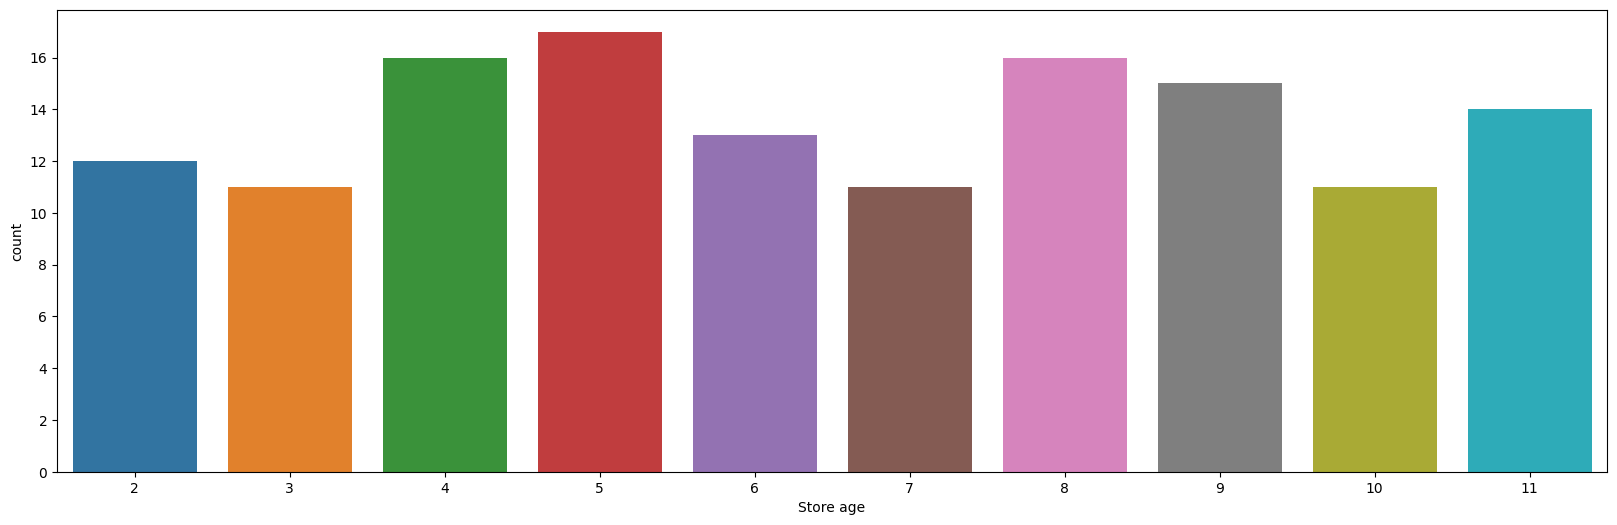

In [16]:
plt.figure(figsize=(20,6))
sns.countplot(data = df, x = df['Store age'])


<AxesSubplot: xlabel='Performance', ylabel='count'>

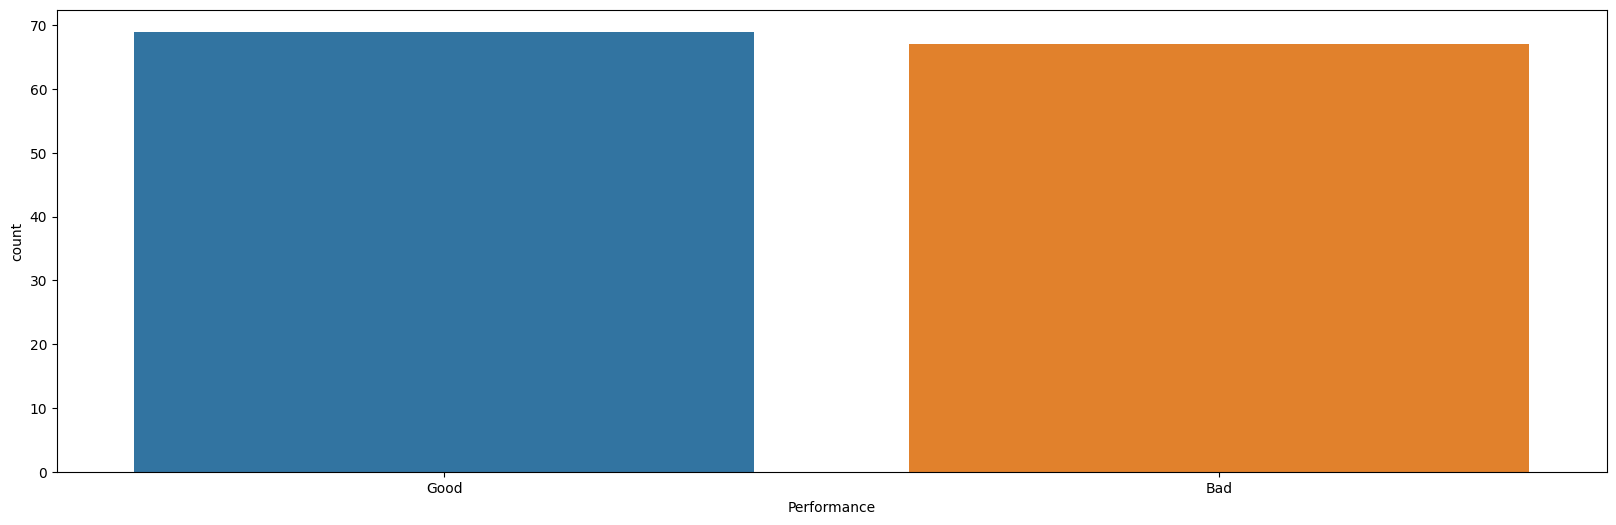

In [17]:
plt.figure(figsize=(20,6))
sns.countplot(data = df, x = df['Performance'])

In [18]:
df['Performance'] = df['Performance'].astype('category')
df['Car park'] = df['Car park'].astype('category')
df['Store age'] = df['Store age'].astype('category')
df.dtypes

Town                    object
Country                 object
Store ID                 int64
Manager name            object
Staff                    int64
Floor Space              int64
Window                   int64
Car park              category
Demographic score        int64
Location                object
40min population         int64
30 min population        int64
20 min population        int64
10 min population        int64
Store age             category
Clearance space          int64
Competition number       int64
Competition score        int64
Performance           category
dtype: object

In [19]:
df.columns

Index(['Town', 'Country', 'Store ID', 'Manager name', 'Staff', 'Floor Space',
       'Window', 'Car park', 'Demographic score', 'Location',
       '40min population', '30 min population', '20 min population',
       '10 min population', 'Store age', 'Clearance space',
       'Competition number', 'Competition score', 'Performance'],
      dtype='object')

In [20]:
df = df.drop('Country', axis = 1)

In [21]:
df = df.drop('Store ID', axis =1)

In [22]:
mf = pd.get_dummies(df)

In [23]:
mf

,Staff,Floor Space,Window,Demographic score,40min population,30 min population,20 min population,10 min population,Clearance space,Competition number,...,Store age_4,Store age_5,Store age_6,Store age_7,Store age_8,Store age_9,Store age_10,Store age_11,Performance_Bad,Performance_Good
0,9,18526,121,10,1288374,1138224,1006986,1002340,238,16,...,0,0,0,0,0,0,0,0,0,1
1,8,18569,121,11,1086225,1015321,1012182,1008436,384,15,...,1,0,0,0,0,0,0,0,0,1
2,-2,12288,105,12,1595638,1281661,1104490,1011395,219,13,...,0,0,0,0,0,0,0,1,1,0
3,7,17092,117,14,1179395,1022959,1009496,1002169,261,15,...,0,1,0,0,0,0,0,0,1,0
4,7,11307,103,18,1398558,1085170,1003137,1002513,200,19,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,7,14120,110,13,1665074,1240813,1141898,1041041,202,18,...,0,0,1,0,0,0,0,0,1,0
132,6,11205,103,15,1657769,1424404,1378708,1160929,203,13,...,0,1,0,0,0,0,0,0,1,0
133,7,16190,115,19,1407456,1359511,1200486,1063718,341,18,...,0,0,0,1,0,0,0,0,1,0
134,6,15516,113,17,1451087,1245725,1127276,1045154,261,14,...,0,0,0,0,0,0,0,1,1,0


In [24]:
mf.columns

Index(['Staff', 'Floor Space', 'Window', 'Demographic score',
       '40min population', '30 min population', '20 min population',
       '10 min population', 'Clearance space', 'Competition number',
       ...
       'Store age_4', 'Store age_5', 'Store age_6', 'Store age_7',
       'Store age_8', 'Store age_9', 'Store age_10', 'Store age_11',
       'Performance_Bad', 'Performance_Good'],
      dtype='object', length=282)

In [25]:
train = mf.drop(['Performance_Bad', 'Performance_Good'], axis = 1)
test = mf[['Performance_Bad', 'Performance_Good']]

In [26]:
df['Car park'].unique()

['Yes', 'No']
Categories (2, object): ['No', 'Yes']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(train, test, test_size=0.3, random_state=2)

In [28]:
regr = LinearRegression()


In [29]:
regr.fit(X_train, y_train)

LinearRegression()

In [30]:
pred = regr.predict(X_test)

In [31]:
regr.score(X_test, y_test)

-610.3696500631388

In [32]:
regr.score(X_train, y_train)

1.0